In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
#Read the image
umbrella_image = cv.imread("umbrella.jpg")
flowers_image = cv.imread("flowers.png")
lena_image = cv.imread("lena.png")
graffiti_image = cv.imread("graffiti.jpg")
baboon_image = cv.imread("baboon.png")

In [3]:
# Shape Printing
print(umbrella_image.shape)
print(flowers_image.shape)
print(lena_image.shape)
print(graffiti_image.shape)
print(baboon_image.shape)

(1024, 1024, 3)
(512, 512, 3)
(512, 512, 3)
(2048, 2048, 3)
(512, 512, 3)


In [4]:
# Resizing for (255,255,3)   !  PLEASE RUN ONLY ONCE
width_umbrella = int(umbrella_image.shape[1]  // 4)
height_umbrella = int(umbrella_image.shape[0] // 4)
dim_umbrella = (width_umbrella, height_umbrella)
umbrella_image = cv.resize(umbrella_image,dim_umbrella,interpolation = cv.INTER_AREA)

width_flowers = int(flowers_image.shape[1]  // 2)
height_flowers = int(flowers_image.shape[0] // 2)
dim_flowers = (width_flowers, height_flowers)
flowers_image = cv.resize(flowers_image,dim_flowers,interpolation = cv.INTER_AREA)

width_lena = int(lena_image.shape[1]  // 2)
height_lena = int(lena_image.shape[0] // 2)
dim_lena = (width_lena, height_lena)
lena_image = cv.resize(lena_image,dim_lena,interpolation = cv.INTER_AREA)

width_graffiti = int(graffiti_image.shape[1]  // 8)
height_graffiti = int(graffiti_image.shape[0] // 8)
dim_graffiti = (width_graffiti, height_graffiti)
graffiti_image = cv.resize(graffiti_image,dim_graffiti,interpolation = cv.INTER_AREA)

width_baboon = int(baboon_image.shape[1]  // 2)
height_baboon = int(baboon_image.shape[0] // 2)
dim_baboon = (width_baboon, height_baboon)
baboon_image = cv.resize(baboon_image,dim_baboon,interpolation = cv.INTER_AREA)

In [5]:
#Check Size
print(umbrella_image.shape)
print(flowers_image.shape)
print(lena_image.shape)
print(graffiti_image.shape)
print(baboon_image.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [6]:
# Changing our images  to 2D arrays
umbrella_2D = umbrella_image.reshape((-1,3))
flowers_2D = flowers_image.reshape((-1,3))
lena_2D = lena_image.reshape((-1,3))
graffiti_2D = graffiti_image.reshape((-1,3))
baboon_2D = baboon_image.reshape((-1,3))

In [7]:
umbrella_2D

array([[183, 181, 203],
       [179, 177, 199],
       [177, 175, 197],
       ...,
       [  9,  10,  22],
       [  7,   7,  16],
       [  8,   8,  14]], dtype=uint8)

In [8]:
# Finding size
size = ((flowers_image.shape[0] * flowers_image.shape[1]) * 3)

In [9]:
size

196608

In [10]:
# Finding how many unique colors a single image consists of 
unique , umbrella_counts = np.unique(umbrella_image.reshape(-1, umbrella_image.shape[-1]), axis=0, return_counts=True)
unique_1 , flowers_counts = np.unique(flowers_image.reshape(-1, flowers_image.shape[-1]), axis=0, return_counts=True)
unique_2 , lena_counts = np.unique(lena_image.reshape(-1, lena_image.shape[-1]), axis=0, return_counts=True)
unique_3 , graffiti_counts = np.unique(graffiti_image.reshape(-1, graffiti_image.shape[-1]), axis=0, return_counts=True)
unique_4 , baboon_counts = np.unique(baboon_image.reshape(-1, baboon_image.shape[-1]), axis=0, return_counts=True)

In [11]:
# Printing the unique colors
print(umbrella_counts.size)
print(flowers_counts.size)
print(lena_counts.size)
print(graffiti_counts.size)
print(baboon_counts.size)

49512
57848
48331
47080
62070


In [12]:
# Making an array for Kmean implementation
arr = [2,4,8,16,32,64,128,256]

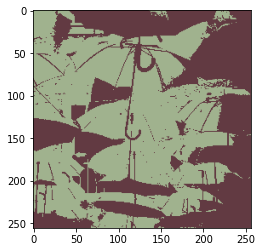

n_clusters:  2


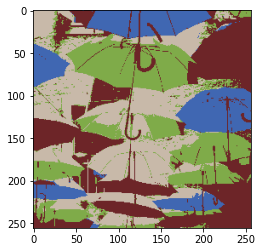

n_clusters:  4


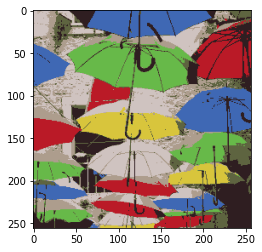

n_clusters:  8


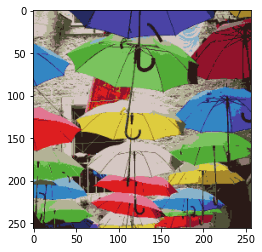

n_clusters:  16


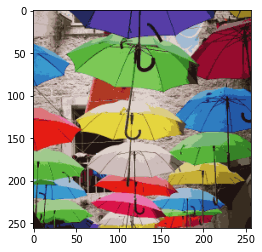

n_clusters:  32


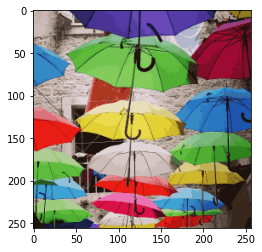

n_clusters:  64


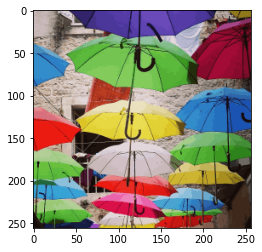

n_clusters:  128


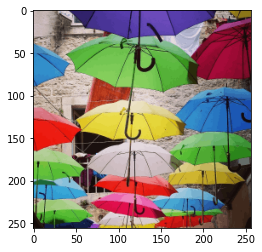

n_clusters:  256


In [13]:
#Calcating WCSS , kmeans implement for all clusters for umbrella type and showing every one of them below 4 cells do the same as well
# Also we are turning our 2d array to 3d back to plot the images
wcss_umbrella = []
for i in arr:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(umbrella_2D)
    compressed_image_umb = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image_umb = np.clip(compressed_image_umb.astype('uint8'), 0, 255)
    compressed_image_umb = compressed_image_umb.reshape(umbrella_image.shape[0], umbrella_image.shape[1], 3)
    img2 = compressed_image_umb[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    print("n_clusters: ",i)
    wcss_umbrella.append(kmeans.inertia_)

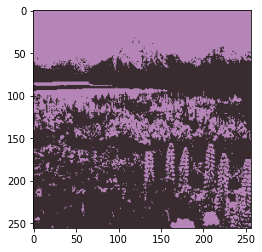

n_clusters:  2


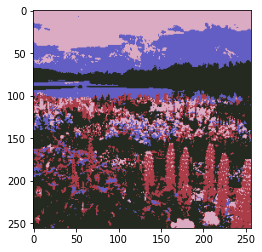

n_clusters:  4


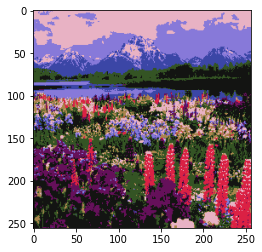

n_clusters:  8


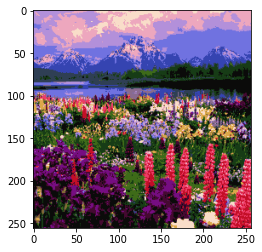

n_clusters:  16


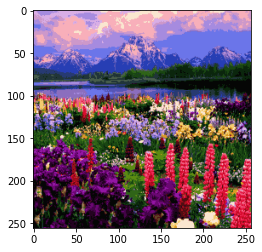

n_clusters:  32


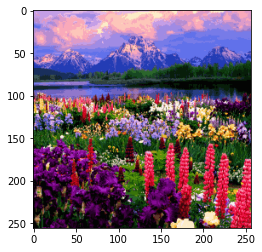

n_clusters:  64


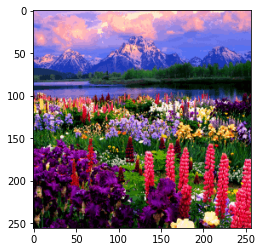

n_clusters:  128


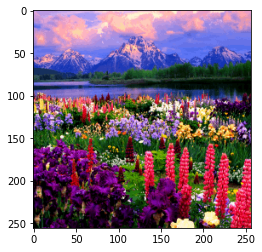

n_clusters:  256


In [14]:
wcss_flowers = []
for i in arr:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(flowers_2D)
    compressed_image_flw = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image_flw = np.clip(compressed_image_flw.astype('uint8'), 0, 255)
    compressed_image_flw = compressed_image_flw.reshape(flowers_image.shape[0], flowers_image.shape[1], 3)
    img2 = compressed_image_flw[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    print("n_clusters: ",i)
    wcss_flowers.append(kmeans.inertia_)

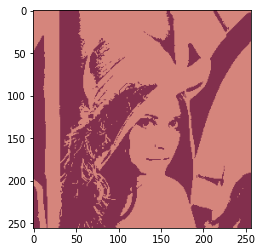

n_clusters:  2


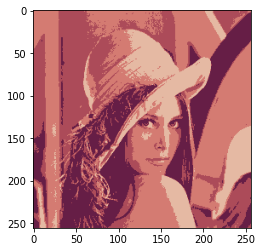

n_clusters:  4


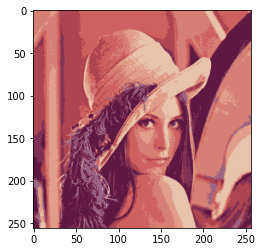

n_clusters:  8


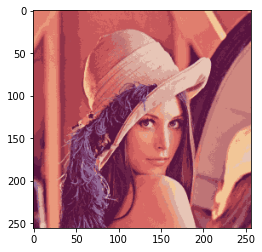

n_clusters:  16


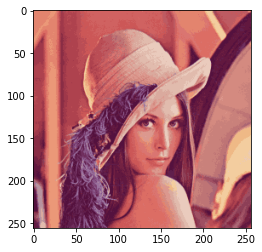

n_clusters:  32


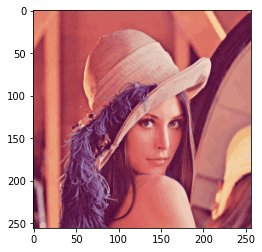

n_clusters:  64


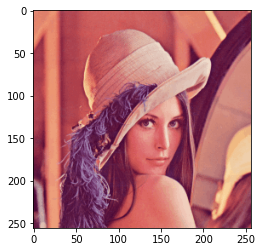

n_clusters:  128


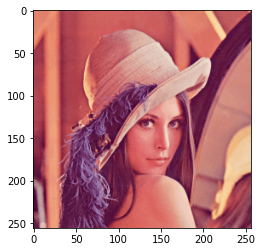

n_clusters:  256


In [15]:
wcss_lena = []
for i in arr:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(lena_2D)
    compressed_image_lna = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image_lna = np.clip(compressed_image_lna.astype('uint8'), 0, 255)
    compressed_image_lna = compressed_image_lna.reshape(lena_image.shape[0], lena_image.shape[1], 3)
    img2 = compressed_image_lna[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    print("n_clusters: ",i)
    wcss_lena.append(kmeans.inertia_)

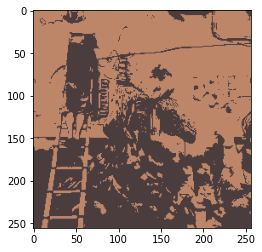

n_clusters:  2


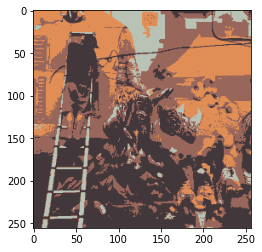

n_clusters:  4


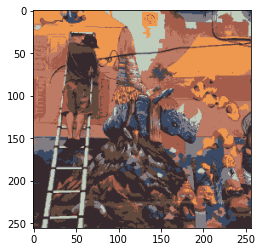

n_clusters:  8


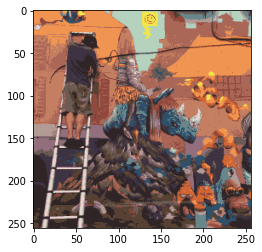

n_clusters:  16


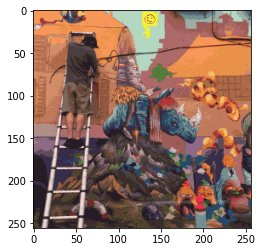

n_clusters:  32


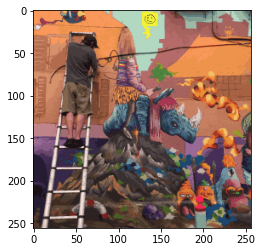

n_clusters:  64


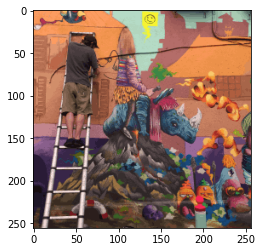

n_clusters:  128


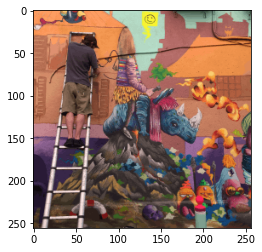

n_clusters:  256


In [16]:
wcss_graffite = []
for i in arr:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(graffiti_2D)
    compressed_image_grf = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image_grf = np.clip(compressed_image_grf.astype('uint8'), 0, 255)
    compressed_image_grf = compressed_image_grf.reshape(graffiti_image.shape[0], graffiti_image.shape[1], 3)
    img2 = compressed_image_grf[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    print("n_clusters: ",i)
    wcss_graffite.append(kmeans.inertia_)

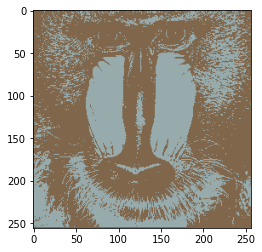

n_clusters:  2


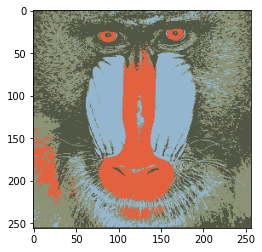

n_clusters:  4


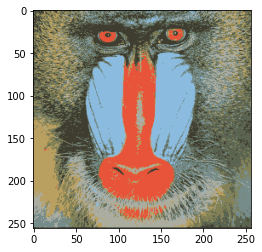

n_clusters:  8


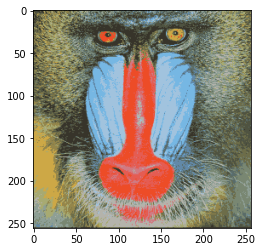

n_clusters:  16


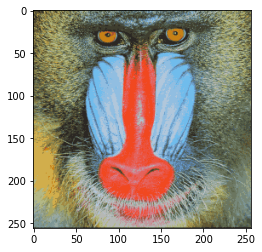

n_clusters:  32


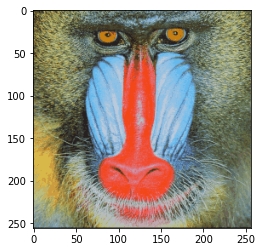

n_clusters:  64


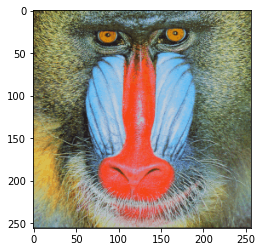

n_clusters:  128


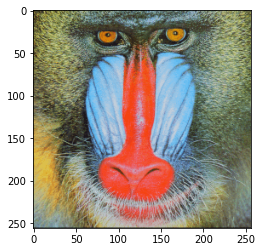

n_clusters:  256


In [17]:
wcss_baboon = []
for i in arr:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(baboon_2D)
    compressed_image_bab = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image_bab = np.clip(compressed_image_bab.astype('uint8'), 0, 255)
    compressed_image_bab = compressed_image_bab.reshape(baboon_image.shape[0], baboon_image.shape[1], 3)
    img2 = compressed_image_bab[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    print("n_clusters: ",i)
    wcss_baboon.append(kmeans.inertia_)

## ELBOW METHOD

In [18]:
print(wcss_flowers)

[488348711.302121, 257569668.355879, 139466465.42936283, 75683048.0856542, 42476447.04917699, 25244986.243954662, 15223472.136311915, 9323102.684593398]


In [20]:
umb_wc_0 = wcss_umbrella[0::2]
flw_wc_0 = wcss_flowers[0::2]
lna_wc_0 = wcss_lena[0::2]
grf_wc_0 = wcss_graffite[0::2]
bab_wc_0 = wcss_baboon[0::2]

In [21]:
umb_wc_1 = wcss_umbrella[1::2]
flw_wc_1 = wcss_flowers[1::2]
lna_wc_1 = wcss_lena[1::2]
grf_wc_1 = wcss_graffite[1::2]
bab_wc_1 = wcss_baboon[1::2]

In [22]:
for i in range(4):
    print(umb_wc_0[i]-umb_wc_1[i])

250254088.01676178
61323348.32232003
13916634.150904391
3246605.6730250344


In [23]:
for i in range(4):
    print(flw_wc_0[i]-flw_wc_1[i])

230779042.94624197
63783417.343708634
17231460.80522233
5900369.451718517


In [24]:
for i in range(4):
    print(lna_wc_0[i]-lna_wc_1[i])

95418673.43486542
12225825.421689115
2759186.795151793
884995.6913883691


In [25]:
for i in range(4):
    print(grf_wc_0[i]-grf_wc_1[i])

112014602.19495739
24533973.1283445
9116842.777768275
2516259.8133152616


In [26]:
for i in range(4):
    print(bab_wc_0[i]-bab_wc_1[i])

180367014.5082992
29039478.577321
7574100.009146398
2733340.766793588
